<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day2/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train=x_train.reshape(60000, 28, 28, 1)
x_train=x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)

Now we implement the LeNet CNN architecture introduced by LeCun+98.
This model includes two convolutional layers followed by 3 fully connected layers.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (2,2)),
    tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
EPOCHS = 10
BATCH_SIZE = 32
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_acc', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

In [0]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Here we have used the Adam Optimizer with its default parameters. 
It is recommended to play with the optimizer and or the learning rate to investigate the progression of the loss function optimization.

##Exercise

Remember our discussion of model evaluation with cross validation!
As an exercise, try to implment a function that picks a right set of values for the learning rate and the batch size using the $k-$fold cross validation.

###Note

You should not include the test set in the cross-validation! 

In [0]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS, 
                    callbacks = [early_stopping], 
                    verbose = 1)

We have used ``` early stopping ``` to avoide overfitting. 
The advantage of early stopping is that it stops the optimization 
when a given metric evaluated on the validation set converges.
Recall from the lecture on day 2 that another effective way of combatting overfitting in Neural Neyworks is Dropout.


In [0]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

ax[0].plot(epochs, acc, label='Training accuracy')
ax[0].plot(epochs, val_acc, label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc=0)

ax[1].semilogy(epochs, loss, label='Training loss')
ax[1].semilogy(epochs, val_loss, label='Validation loss')
ax[1].set_title('Training and validation Loss')
ax[1].legend(loc=0)

plt.show()

Recall from the lecture that the convolution layers act as feature extractors! 

Let's take a look at some of the activation layers once applied to a given example in the test set.

In [0]:
def vizualize_activations(test_index):
  '''
  It shows the output of different convolution and pooling 
  layers in the Lenet CNN

  input: image index in the test set 
  '''
  print("Vizualising the output of Convolution layers and Pooling layer for test example "+str(test_index))
  img = x_test[test_index]
  layer_outputs = [layer.output for layer in model.layers][0:]
  activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
  feature_maps = activation_model.predict(img.reshape(1, 28, 28, 1))
  nlayers = len(feature_maps)
  for layer_index in range(4):
    layer_feature_maps = feature_maps[layer_index][0]
    layer_depth = layer_feature_maps.shape[-1]
    fig, ax = plt.subplots(nrows = 1, ncols = layer_depth)
    if np.mod(layer_index ,2) == 0:
      ax[0].set_ylabel("CONV2D")
    else:
      ax[0].set_ylabel("Average Pooling")  
    for i in range(layer_depth):
      ax[i].imshow(layer_feature_maps[:,:,i])
      ax[i].set_xticks([])
      ax[i].set_yticks([])
    
  return None

Vizualising the output of Convolution layers and Pooling layer for test example 1
Vizualising the output of Convolution layers and Pooling layer for test example 10
Vizualising the output of Convolution layers and Pooling layer for test example 100


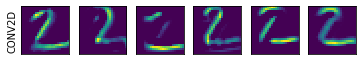

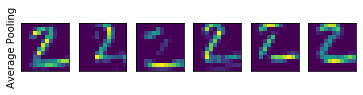

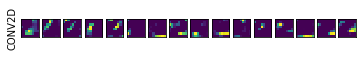

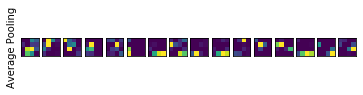

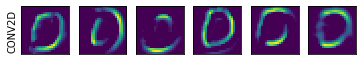

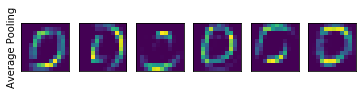

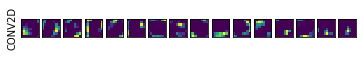

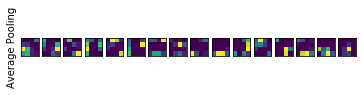

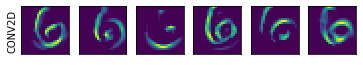

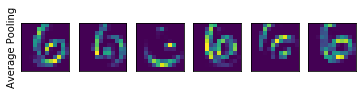

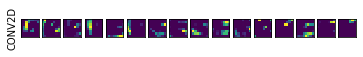

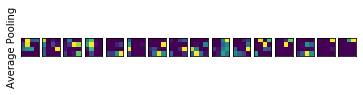

In [9]:
for index in [1, 10, 100]:
    vizualize_activations(index)

As expected, the convolution layers capture the features encoded in the images. While the first convolutional layers extract the low level features such as the edges of objects, the last convolutional layers extract the more fine and high-level features of the images. 

The pooling layers help with keeping the model invariant with respect to possible translations in the features. In addition, they help with reducing the computational complexity of the model. 

Lastly, the classification is done by the fully connected layer using the features that are extracted with the convolutions.